In [413]:
from google.colab import drive
drive.mount('/content/drive')
paths = '/content/drive/MyDrive/BRICS_MAIN/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [414]:
import pandas as pd
import numpy as np
train_data = pd.read_csv(paths+'TRAIN.csv')
test_data = pd.read_csv(paths+'PUBLIC_TEST.csv',nrows=8760)

def datasetInfo(data: pd.DataFrame, id_column: str, target_column: str):
    """
    Display comprehensive information about a pandas DataFrame.

    Arguments:
    data -- the DataFrame to display information for

    Returns:
    categorical_cols -- list of categorical column names
    numerical_cols -- list of numerical column names
    """

    # Dataset Overview
    print("Dataset Overview")
    print("----------------")
    print(f"Shape: {data.shape}\n")

    # Column Names
    print("Column Names")
    print("------------")
    print(data.columns.tolist())
    print()

    # Data Types
    print("Data Types")
    print("----------")
    print(data.dtypes)
    print()

    # Missing Values
    print("Missing Values")
    print("--------------")
    print(data.isnull().sum().sort_values(ascending=False))
    print()

    # Descriptive Statistics
    print("Descriptive Statistics")
    print("-----------------------")
    display(data.describe().T.sort_values(by='std', ascending=False)
            .style.background_gradient(cmap='GnBu')
            .bar(subset=["max"], color='#BB0000')
            .bar(subset=["mean"], color='green'))
    print()


    # Categorical and Numerical Columns
    categorical_cols = data.select_dtypes(include='object').columns.tolist()
    numerical_cols = data.select_dtypes(exclude='object').columns.tolist()

    categorical_cols = [col for col in categorical_cols if col not in [id_column,target_column]]
    numerical_cols = [col for col in numerical_cols if col not in [id_column, target_column]]

    return categorical_cols, numerical_cols, target_column, id_column
categorical_cols, numerical_cols, target_column, id_column = datasetInfo(data=train_data, id_column= "Person_id", target_column= "OCLF")

Dataset Overview
----------------
Shape: (18720, 43)

Column Names
------------
['Date Time Hour Beginning', 'Original Res Forecast before Lockdown', 'Residual Forecast', 'RSA Contracted Forecast', 'Dispatchable Generation', 'Residual Demand', 'RSA Contracted Demand', 'International Exports', 'International Imports', 'Thermal Generation', 'Nuclear Generation', 'Eskom Gas Generation', 'Eskom OCGT Generation', 'Hydro Water Generation', 'Pumped Water Generation', 'ILS Usage', 'Manual Load_Reduction(MLR)', 'IOS Excl ILS and MLR', 'Dispatchable IPP OCGT', 'Eskom Gas SCO', 'Eskom OCGT SCO', 'Hydro Water SCO', 'Pumped Water SCO Pumping', 'Wind', 'PV', 'CSP', 'Other RE', 'Total RE', 'Wind Installed Capacity', 'PV Installed Capacity', 'CSP Installed Capacity', 'Other RE Installed Capacity', 'Total RE Installed Capacity', 'Installed Eskom Capacity', 'Total PCLF', 'Total UCLF', 'Total OCLF', 'Total UCLF+OCLF', 'Non Comm Sentout', 'Drakensberg Gen Unit Hours', 'Palmiet Gen Unit Hours', 'Ingula Gen

,count,mean,std,min,25%,50%,75%,max
RSA Contracted Demand,18720.000000,25725.171787,3402.623665,14929.991000,22805.003250,26455.137500,28350.948500,34510.146000
RSA Contracted Forecast,18720.000000,25719.888878,3399.669454,15172.651000,22714.525000,26444.247500,28387.519250,35034.349000
Residual Demand,18720.000000,24319.043874,3117.859189,13797.940000,21952.785000,24625.855000,26559.677500,33746.459000
Residual Forecast,18720.000000,24325.177215,3091.013681,14319.136000,21911.445000,24703.047000,26550.826250,34134.043000
Dispatchable Generation,18720.000000,24168.130496,3068.225363,13797.940000,21838.872500,24447.937500,26365.302500,33065.909000
Original Res Forecast before Lockdown,10152.000000,25141.526191,2761.110610,18605.968000,22732.369000,25573.070500,27034.513000,33757.374000
Thermal Generation,18720.000000,21587.973115,2014.249738,14062.000000,20457.000000,21675.610000,22922.000000,27807.000000
Total UCLF+OCLF,18720.000000,10824.923771,1971.051999,5658.000000,9305.750000,10635.000000,12280.250000,17363.000000
Total UCLF,18720.000000,9692.171885,1920.966836,4670.626000,8251.447500,9377.203000,11102.581500,15657.814000
Total PCLF,18720.000000,4774.234295,1856.246751,695.777000,3365.000000,4610.000000,5966.844000,11289.417000


**THE ANALYSIS**


1.   **Hydro Water SCO** has no values(min ,max etc are all 0s) . So it will be removed.
2.   **CSP Installaed Capacity**:Has only one value for all rows,  It will also be removed.
3. ** Other RE Installed Capacity**: Need to check correlation to target.
4.  **Eskom Gas Generation**: The max is 323 but mean is 0.2. Have to check it for outliers. Need to use a boxplot/histogram
5. **Eskom Gas SCO**: has negative values in category like format. Possibly consider changing to positive values.
6. **Unnamed: 42** : Although it has missing values. I might just remove the missing rows, since they are few.
7. **Original Res Forecast before Lockdown** : 45% missing values. This column will be removed.
8. **ILS Usage** need to check for outliers: 843.350000 is the max but 5.3 is the mean
9. **Other RE Installed Capacity** , The values in this column are within a small range: 22-25. Might be significant.
10. **Pumped Water SCO Pumping** , **Eskom OCGT SCO**,**Eskom Gas SCO**, have negative values. Probably a normal in the data
11. **Other RE** : The minumm is 0.8 whilst maximum is 21 and mean is 10, Check for possible outliers.
12. **IOS Excl ILS and MLR** These values might have outliers.
#**Action**


1.   Drop columns :**Hydro Water SCO**,**CSP Installaed Capacity**,**Original Res Forecast before Lockdown**
2.   Just drop only missing values,rows: **Unnamed: 42**
3. Make a list of preliminary features to use   ['RSA Contracted Demand','RSA Contracted Forecast','Residual  Demand','Residual Forecast','Dispatchable Generation','Thermal Generation','Installed Eskom Capacity','Pumped Water Generation','PV','Drakensberg Gen Unit Hours','Manual Load_Reduction(MLR)','Wind Installed Capacity','Nuclear Generation','CSP','Other RE Installed Capacity','Total RE Installed Capacity','Eskom OCGT Generation','CSP Installed Capacity','Hydro Water SCO']
That shows no outliers or missing values.





Outlier Analysis

In [415]:
print(train_data['Hydro Water SCO'].unique())
print(train_data['CSP Installed Capacity'].unique())
print(train_data['Eskom Gas SCO'].unique())

[0]
[500]
[-2 -1 -3  0 -4]


In [416]:
train_df  = train_data.drop(['Original Res Forecast before Lockdown','Hydro Water SCO','CSP Installed Capacity'],axis=1)
test_df   = test_data.drop(['Original Res Forecast before Lockdown','Hydro Water SCO','CSP Installed Capacity'],axis=1)

total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Unnamed: 42,32,0.001709
Residual Forecast,0,0.000000
PV,0,0.000000
CSP,0,0.000000
Other RE,0,0.000000
Total RE,0,0.000000
Wind Installed Capacity,0,0.000000
PV Installed Capacity,0,0.000000
Other RE Installed Capacity,0,0.000000
Total RE Installed Capacity,0,0.000000


# **Oulier Analysis**


1.   Suspected outliers in **Eskom Gas Generation**,**ILS Usage**,**Manual Load_Reduction(MLR)**, **Other RE**.



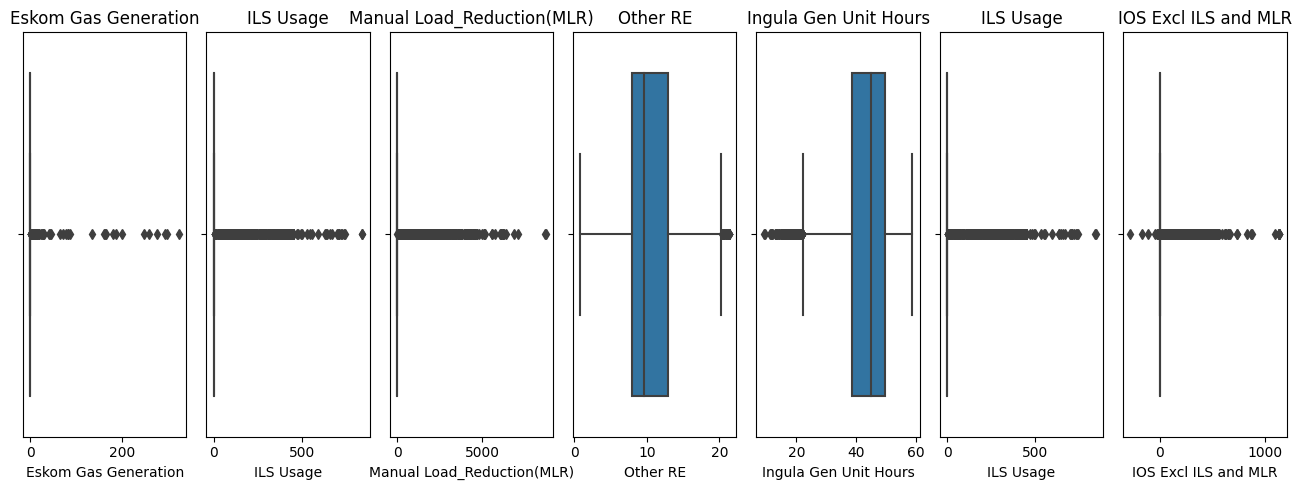

In [417]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named df with multiple columns

# Get the list of column names
columns_to_plot = ['Eskom Gas Generation','ILS Usage','Manual Load_Reduction(MLR)','Other RE','Ingula Gen Unit Hours','ILS Usage','IOS Excl ILS and MLR']

# Set the number of columns for the subplot grid
num_cols = len(columns_to_plot)

# Set up subplots with the specified number of columns
fig, axes = plt.subplots(1, num_cols, figsize=(13, 5))  # You can adjust the figsize as needed

# Iterate through the columns and create boxplots for each one
for i, column in enumerate(columns_to_plot):
    sns.boxplot(data=train_data, x=column, ax=axes[i])
    axes[i].set_title(f"{column}")

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()



**Outlier Analysis**


1.   Eskom Gas Generation,ILS Usage,Manual Load_Reduction(MLR),'ILS Usage','IOS Excl ILS and MLR'. The values are not outliers but they are just increasing in nature. Probably Trend Analysis can show more clarity.

# **Action**


1.   Only Other RE and Ingula Gen Unit Hours are confirmed to have outliers. Approriate action to remove them will be done





In [418]:
#DEAL WITH OUTLIERS
from ipywidgets.widgets.interaction import Real

for col in ['Other RE','Ingula Gen Unit Hours']:
    for data in [train_df,test_df]:
      q1 = data[col].quantile(.25)
      # Select the third quantile
      q3 = data[col].quantile(.75)
      # Create a mask inbeetween q1 & q3
      mask = data[col].between(q1, q3, inclusive=True)
      # Filtering the initial dataframe with a mask
      no_outlier = data.loc[mask, col]
      data[col] = no_outlier

train_df.dropna(subset = ['Unnamed: 42','Other RE','Ingula Gen Unit Hours'], inplace=True)
test_df.dropna(subset = ['Unnamed: 42','Other RE','Ingula Gen Unit Hours'], inplace=True)

<ipython-input-418-8606810e2b94>:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  mask = data[col].between(q1, q3, inclusive=True)
<ipython-input-418-8606810e2b94>:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  mask = data[col].between(q1, q3, inclusive=True)
<ipython-input-418-8606810e2b94>:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  mask = data[col].between(q1, q3, inclusive=True)
<ipython-input-418-8606810e2b94>:10: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  mask = data[col].between(q1, q3, inclusive=True)


In [419]:
for col in train_df.columns:
    weird = (train_df[[col]].applymap(type) != train_df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(train_df[weird]) > 0:
        print(col)

for col in test_df.columns:
    weird = (test_df[[col]].applymap(type) != test_df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(test_df[weird]) > 0:
        print(col)

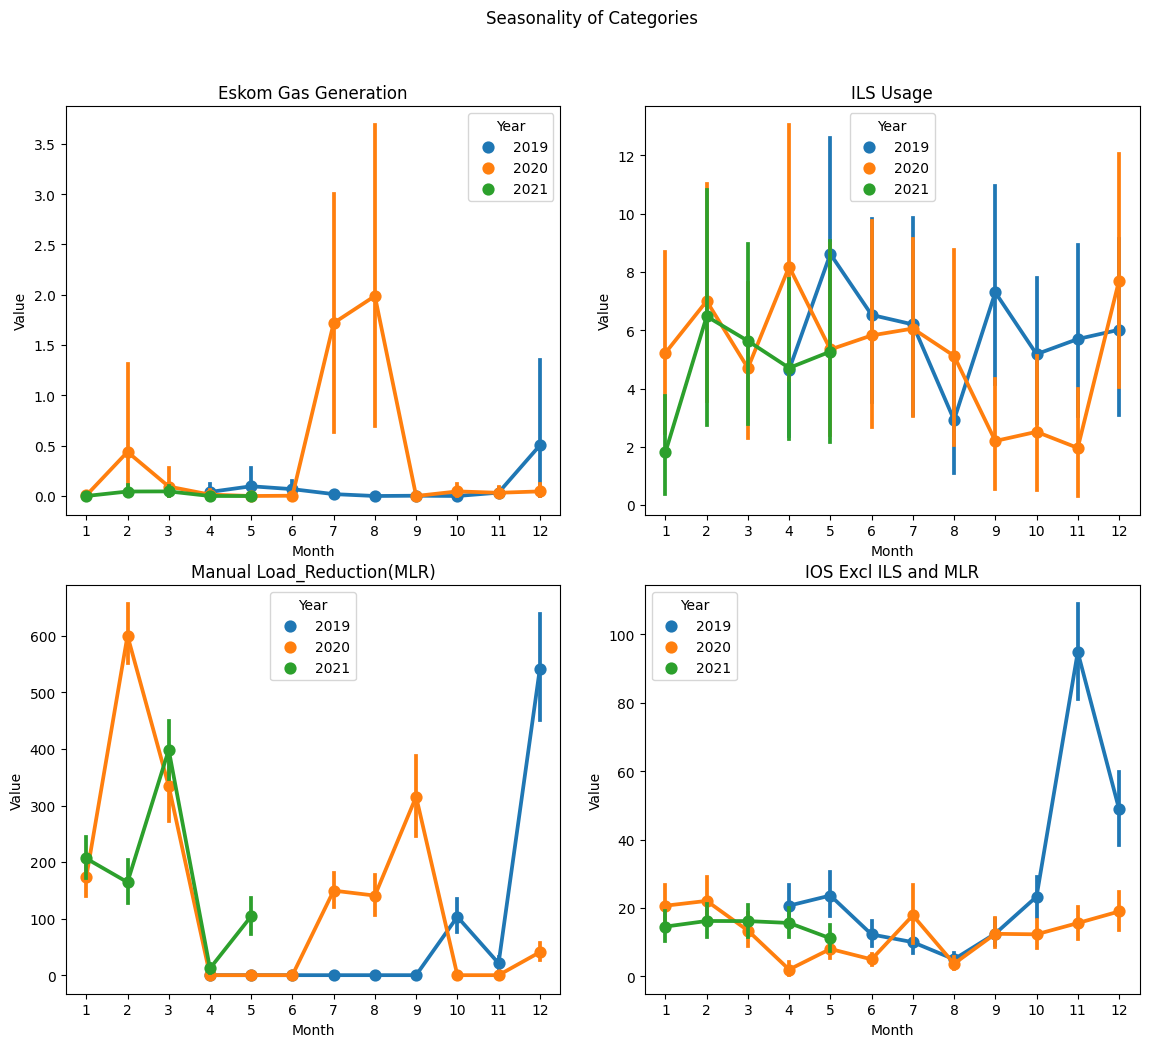

In [420]:
import math
train_data['Year'] = pd.DatetimeIndex(train_data['Date Time Hour Beginning']).year
train_data['Month'] = pd.DatetimeIndex(train_data['Date Time Hour Beginning']).month
categories_to_plot = ['Eskom Gas Generation','ILS Usage','Manual Load_Reduction(MLR)','IOS Excl ILS and MLR']


num_categories = len(categories_to_plot)
num_rows = math.ceil(num_categories / 2)
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Iterate over each category and plot its seasonality
for i, category in enumerate(categories_to_plot):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]

    sns.pointplot(x='Month', y=category, hue='Year', data=train_data, ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Hide any unused subplots
for i in range(num_categories, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.axis('off')

plt.suptitle('Seasonality of Categories', y=1.05)
plt.show()


Eskom Gas Generation,ILS Usage,Manual Load_Reduction(MLR),'ILS Usage','IOS Excl ILS and MLR'are just exhibiting trend behaviour according to months.

# **Correlation Analysis**


In [ ]:
numerical_columns = ['RSA Contracted Demand','RSA Contracted Forecast','Residual Demand','Residual Forecast',
                    'Dispatchable Generation','Thermal Generation','Installed Eskom Capacity','Pumped Water Generation',
                    'PV','Drakensberg Gen Unit Hours','Manual Load_Reduction(MLR)','Other RE',
                    'Wind Installed Capacity','Nuclear Generation','CSP','Other RE Installed Capacity',
                    'Total RE Installed Capacity','Eskom OCGT Generation','Eskom Gas SCO','Non Comm Sentout','PV Installed Capacity',
                    'Dispatchable IPP OCGT','International Exports','International Imports','Hydro Water Generation','Manual Load_Reduction(MLR)',
                    'Eskom Gas Generation','ILS Usage','Eskom OCGT SCO','Pumped Water SCO Pumping','Eskom Gas SCO',
                    'Other RE','Ingula Gen Unit Hours','IOS Excl ILS and MLR','ILS Usage','Palmiet Gen Unit Hours','Unnamed: 42']

cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

corrmat = train_df.corr()
k = 30 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'Total OCLF')['Total OCLF'].index
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_df[numerical_columns].corr(), vmax=.8, square=True, cmap=cmap, annot=True, fmt=".2f");

# Assuming you have already calculated the correlation matrix `corrmat`

# Create a DataFrame to store the pairs of columns and their correlations
negative_correlations = []

# Iterate through the correlation matrix and identify negative correlations
for column1 in corrmat.columns:
    for column2 in corrmat.index:
        correlation = corrmat.loc[column2, column1]
        if column1 != column2 and correlation < 0:
            if column2 == 'Total OCLF':
              negative_correlations.append((column1, column2, correlation))

# Create a DataFrame from the list of negative correlations
negative_corr_df = pd.DataFrame(negative_correlations, columns=['Column1', 'Column2', 'Correlation'])

# Display the DataFrame of negative correlations
consider_drop_Total_OCLF = list(negative_corr_df['Column1'].values)

<ipython-input-421-0ee777b4f638>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_df.corr()


In [ ]:
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

corrmat = train_df.corr()
k = 30 # Number of variables for heatmap
cols = corrmat.nlargest(k, 'Total UCLF')['Total UCLF'].index
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_df[numerical_columns].corr(), vmax=.8, square=True, cmap=cmap, annot=True, fmt=".2f");

import pandas as pd

# Assuming you have already calculated the correlation matrix `corrmat`

# Create a DataFrame to store the pairs of columns and their correlations
negative_correlations = []

# Iterate through the correlation matrix and identify negative correlations
for column1 in corrmat.columns:
    for column2 in corrmat.index:
        correlation = corrmat.loc[column2, column1]
        if column1 != column2 and correlation < 0:
            if column2 == 'Total UCLF':
              negative_correlations.append((column1, column2, correlation))

# Create a DataFrame from the list of negative correlations
negative_corr_df = pd.DataFrame(negative_correlations, columns=['Column1', 'Column2', 'Correlation'])

# Display the DataFrame of negative correlations
consider_drop_Total_UCLF = list(negative_corr_df['Column1'].values)

# **Then check if the data preparation steps worked**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

experiment_columns = ['RSA Contracted Demand','RSA Contracted Forecast','Residual Demand','Residual Forecast',
                'Dispatchable Generation','Thermal Generation','Installed Eskom Capacity',
                'Wind Installed Capacity','CSP','Other RE Installed Capacity','Non Comm Sentout','Dispatchable IPP OCGT','Hydro Water Generation',
                'Manual Load_Reduction(MLR)','Eskom Gas Generation','ILS Usage','Pumped Water SCO Pumping','Other RE','Ingula Gen Unit Hours','IOS Excl ILS and MLR',
                'ILS Usage','Unnamed: 42']

so_far_columns = ['RSA Contracted Demand','RSA Contracted Forecast','Residual Demand','Residual Forecast',
                    'Dispatchable Generation','Thermal Generation','Installed Eskom Capacity','Pumped Water Generation',
                    'PV','Drakensberg Gen Unit Hours','Manual Load_Reduction(MLR)','Other RE',
                    'Wind Installed Capacity','Nuclear Generation','CSP','Other RE Installed Capacity',
                    'Total RE Installed Capacity','Eskom OCGT Generation','Eskom Gas SCO','Non Comm Sentout','PV Installed Capacity',
                    'Dispatchable IPP OCGT','International Exports','International Imports','Hydro Water Generation','Manual Load_Reduction(MLR)',
                    'Eskom Gas Generation','ILS Usage','Eskom OCGT SCO','Pumped Water SCO Pumping','Eskom Gas SCO',
                    'Other RE','Ingula Gen Unit Hours','IOS Excl ILS and MLR','ILS Usage','Palmiet Gen Unit Hours','Unnamed: 42']


print(len(so_far_columns))

target_cols = ['Total UCLF','Total OCLF']
lr_models = {}

y_train = train_df[target_cols]
y_val = test_df[target_cols]

X_train = train_df.drop(['Total UCLF','Total OCLF','Total UCLF+OCLF'],axis=1)
X_test = test_df.drop(['Total UCLF','Total OCLF','Total UCLF+OCLF'],axis=1)

X_train_oclf = X_train[list(set(so_far_columns) - set(consider_drop_Total_OCLF))]
X_test_oclf = X_test[list(set(so_far_columns) - set(consider_drop_Total_OCLF))]


X_train_uclf = X_train[so_far_columns]
X_test_uclf = X_test[so_far_columns]

#X_train_uclf = X_train[list(set(so_far_columns) - set(consider_drop_Total_UCLF))]
#X_test_uclf = X_test[list(set(so_far_columns) - set(consider_drop_Total_UCLF))]


y_pred = []

for target_col in target_cols:
  lr_model = LinearRegression()
  if target_col == 'Total OCLF':
    X_train_scaled = scaler1.fit_transform(X_train_oclf)
  elif target_col == 'Total UCLF':
     X_train_scaled = scaler2.fit_transform(X_train_uclf)
  lr_model.fit(X_train_scaled, y_train[target_col])
  lr_models[target_col] = lr_model

print(lr_models)
for target_col in target_cols:
   if target_col == 'Total OCLF':
    X_val_scaled = scaler1.transform(X_test_oclf)
   elif target_col == 'Total UCLF':
    X_val_scaled = scaler2.transform(X_test_uclf)

   lr_model = lr_models[target_col]
   y_pred_col = lr_model.predict(X_val_scaled)
   y_pred.append(y_pred_col)

df1 = pd.DataFrame({'y_pred': y_pred[0], 'y_val': y_val[target_cols[0]].values})
df2 = pd.DataFrame({'y_pred': y_pred[1], 'y_val': y_val[target_cols[1]].values})

rmse_uclf = np.sqrt(mean_squared_error(df1['y_pred'], df1['y_val']))
rmse_oclf = np.sqrt(mean_squared_error(df2['y_pred'], df2['y_val']))


print(f'RMSE_UCLF: {rmse_uclf}')
print(f'RMSE_OCLF: {rmse_oclf}')
